#### FOUNDATIONS OF MACHINE LEARNING: SUPERVISED LEARNING

<br>

# Honey Production

We want to investigate the decline of the honeybee population and how that affects the honey being made. We want to also see how the trends of the past will predict the future.

<hr>


### Check out the Data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from sklearn import linear_model

from decimal import Decimal

In [3]:
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


<b>Note:</b> The `honeyproduction.csv` was created by Codecademy for the Data Science Path

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
prod_per_year.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [51]:
X = prod_per_year['year']
#print(X)
X = X.values.reshape(-1, 1)

In [39]:
y = prod_per_year['totalprod'].apply(Decimal)
#print(y)

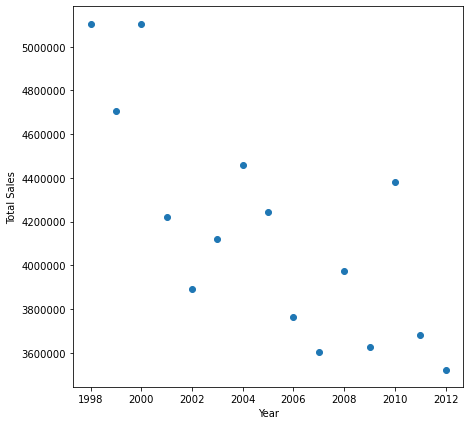

In [44]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)


plt.scatter(X, y)

plt.xlabel('Year')
plt.ylabel('Total Sales')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

plt.show()

### Create and Fit a Linear Regression Model

In [45]:
regr = linear_model.LinearRegression()

In [46]:
regr.fit(X, y)
print(regr.coef_[0]) #this is m
print(regr.intercept_) #this is b

-88303.18915238195
181208083.10732982


In [47]:
y_predict = regr.predict(X)

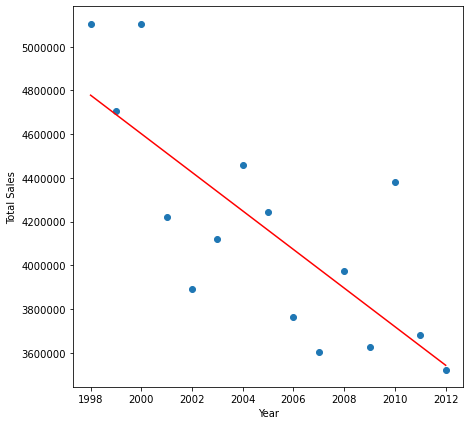

In [49]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)


plt.scatter(X, y)
plt.plot(X, y_predict, color = 'red')

plt.xlabel('Year')
plt.ylabel('Total Sales')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

plt.show()

### Predict the Honey Decline


We want to predict what the year 2050 will look like in terms of honey production.

In [52]:
#since the graph ends at 2012, we will look at the years 2013 to 2050 

X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)

In [53]:
future_predict = regr.predict(X_future)

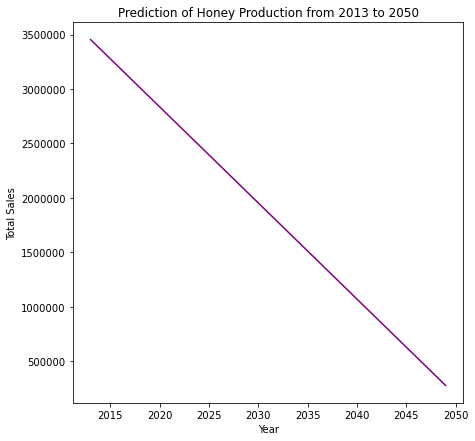

In [55]:
fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111)


plt.plot(X_future, future_predict, color = 'purple')

plt.title("Prediction of Honey Production from 2013 to 2050")
plt.xlabel('Year')
plt.ylabel('Total Sales')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

plt.show()